<a href="https://colab.research.google.com/github/sitikharomah/jaringan-syaraf-tiruan/blob/main/semester5tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
file_path = '/content/drive/MyDrive/Input_JST.xlsx'
df = pd.read_excel("/content/drive/MyDrive/Siti Kharomah/JST/Dataset/Input_JST.xlsx")

In [ ]:
X = df[['Jumlah Unit Terjual', 'Harga', 'Kategori Produk (0 = Laptop, 1 = Smartphone, 2 = Televisi)', 'Penilaian Pelanggan']]
y = df['Terjual Cepat (1 = Terjual Cepat, 0 = Tidak Terjual Cepat)']

In [ ]:
y_categorical = tf.keras.utils.to_categorical(y, num_classes=2) # 2 classes: Terjual Cepat (1) dan Tidak Terjual Cepat (0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input (shape=(4,)), # Input layer with 4 neurons
    tf.keras.layers.Dense(5, activation='relu'), # Hidden Layer 1 with 5 neuron
    tf.keras.layers.Dense(3, activation='relu'),# Hidden Layer 2 with 3 neuron
    tf.keras.layers.Dense(2, activation='softmax') # Output Layer with 2 neuron
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6302 - loss: 0.6737 - val_accuracy: 0.8333 - val_loss: 0.5513
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7548 - loss: 0.6536 - val_accuracy: 0.8333 - val_loss: 0.5435
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7344 - loss: 0.6576 - val_accuracy: 0.8333 - val_loss: 0.5360
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7809 - loss: 0.6117 - val_accuracy: 0.8333 - val_loss: 0.5281
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7947 - loss: 0.6020 - val_accuracy: 0.8333 - val_loss: 0.5212
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8057 - loss: 0.5782 - val_accuracy: 0.8333 - val_loss: 0.5135
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8118 - loss: 0.5912 - val_accuracy: 0.8333 - val_loss: 0.5071
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7916 - loss: 0.5560 - val_accuracy: 0.8333 - val_loss

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8486 - loss: 0.3025  
Test Accuracy: 0.8667
Test Loss: 0.2886


In [ ]:
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

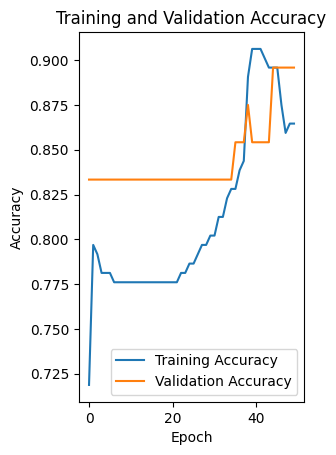

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

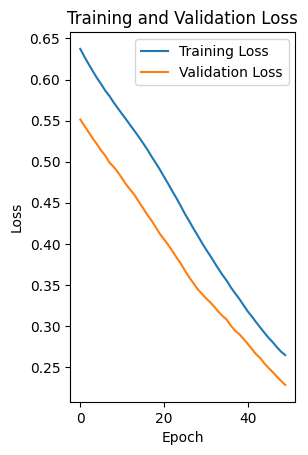

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [ ]:
plt.show()

In [ ]:
new_data = pd.DataFrame({
'Jumlah Unit Terjual': [200, 50, 400], # Jumlah unit terjual
'Harga': [2500, 1500, 3500], # Harga yang sudah disesuaikan dengan kategori
'Kategori Produk (0 = Laptop, 1 = Smartphone, 2 = Televisi)': [0, 1, 2], # Kategori produk
'Penilaian Pelanggan': [4.5, 3.0, 5.0] # Penilaian Pelanggan
})

In [ ]:
new_data_scaled = scaler.transform(new_data)

In [ ]:
predictions = model.predict(new_data_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [ ]:
predicted_classes = np.argmax(predictions, axis=1) # Convert from one_hot encoded to class labels (0 or 1)

In [ ]:
class_labels = ['Tidak Terjual Cepat', 'Terjual Cepat']
predicted_labels = [class_labels[cls] for cls in predicted_classes]
new_data['Prediksi Terjual Cepat'] = predicted_labels
print("\nPrediksi Terjual Cepat:")
print(new_data)


Prediksi Terjual Cepat:
   Jumlah Unit Terjual  Harga  \
0                  200   2500   
1                   50   1500   
2                  400   3500   

   Kategori Produk (0 = Laptop, 1 = Smartphone, 2 = Televisi)  \
0                                                  0            
1                                                  1            
2                                                  2            

   Penilaian Pelanggan Prediksi Terjual Cepat  
0                  4.5          Terjual Cepat  
1                  3.0    Tidak Terjual Cepat  
2                  5.0          Terjual Cepat  
